In [2]:
#Bepreisung von Optionen mittels Monte-Carlo Simulation

In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [60]:
def asian_price(s_0,strike,t,tdays,riskfree,sigma,iteration):
    "Bepreisung einer asiatischen Call Option"
    #s_0 = Preis heute
    #strike= Strike preis
    #t=laufzeit in Jahren
    #tdays= handelstage während der laufzeit
    #riskfree= risikoloserzinssatz
    #sigma= vola
    #iteration = anzahl der simulationen
    
    s_t=np.zeros((tdays,iteration)) #Liste für Kurse zum Zeitpunkt T 
    avg_price=np.zeros((tdays,iteration)) #Liste für Durchschnitsskurse zum Zeitpunktt T
    payoff=[]#Liste für Payoff eines Pfades 
    
    for j in range (0,iteration):
        s_t[0,j]=s_0
    dt=t/tdays #zeitschritte
    
    #Kurse mittels geometrischer Brownscher Bewegung simulieren
    
    for i in range (1,tdays):
        for j in range(0,iteration):
            z=np.random.normal(0,1)
            s_t[i,j] = s_t[i-1,j]*np.exp((riskfree-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*z)  
    
    for i in range(0,iteration): #arithmetischen Durchschnitt der Kurse bilden
        summe=0
        for j in range(0,tdays):
            summe+=s_t[j,i]
            avg_price[j,i]=(summe/(j+1))
    
    #Payoff bilden und diskontieren
    for x in range(0,iteration): 
        payoff.append(max(avg_price[-1,x]-strike,0)*np.exp(-riskfree*dt))
    
    #Durchschnitt der Payoffs bilden (Gesetz der großen Zahlen)
    asianoptionprice  = np.mean(payoff) 
    return asianoptionprice , s_t, avg_price

In [61]:
def europ_call(s_0,strike,t,tdays,riskfree,sigma,iteration):
    "Bepreisung einer europäischen Call Option"
     #s_0 = Preis heute
    #strike= Strike preis
    #t= laufzeit in jahren
    #tdays= anzahl der handelstage während der laufzeit
    #riskfree= risikoloserzinssatz
    #sigma= vola
    #iteration = anzahl der simulationen
    st = np.zeros((tdays,iteration))
    payoff = []
    
    dt=t/tdays #zeitschritte
    
    for j in range(0,iteration):  
        st[0,j] = s_0 
    
    for i in range(1,tdays):
        for j in range(0,iteration):
            z=np.random.normal(0,1)
            st[i,j] = st[i-1,j]*np.exp((riskfree-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*z)
        
    for x in range(0,iteration):
        payoff.append(max(st[-1,x]-strike,0)*np.exp(-riskfree*dt))

    eucall= np.mean(payoff) 
    return eucall

In [62]:
def black_scholes(s,k,r,sigma,t):
    "Funktion zur Call bepreisung"
    d1=(np.log(s/k)+(r+sigma**2/2)*t)/(sigma*np.sqrt(t))
    d2=d1-sigma*np.sqrt(t)
    call= (s * norm.cdf(d1) - k * np.exp(-r * t) * norm.cdf(d2))
    return call

In [63]:
black_scholes(100,100,0.05,0.2,1)

10.450583572185565

In [64]:
europ_call(100,100,1,250,0.05,0.2,10000)

10.62899338759126

In [65]:
asian_price(100,100,1,250,0.05,0.2,10000)[0]

6.1551590741815945

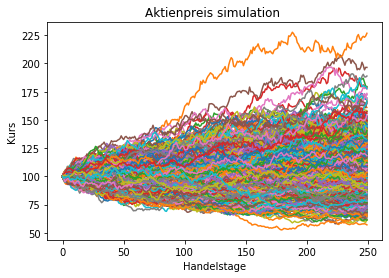

In [66]:
plt.plot(pd.DataFrame(asian_price(100,100,1,250,0.05,0.2,1000)[1]))
plt.title("Aktienpreis simulation ")
plt.xlabel("Handelstage")
plt.ylabel("Kurs")
plt.show()

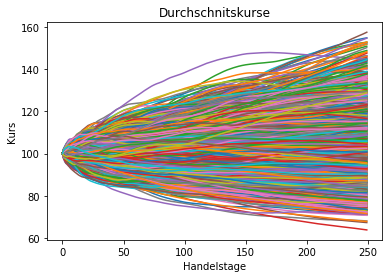

In [67]:
plt.plot(pd.DataFrame(asian_price(100,100,1,250,0.05,0.2,1000)[2]))
plt.title("Durchschnitskurse")
plt.xlabel("Handelstage")
plt.ylabel("Kurs")
plt.show()

In [68]:
#differenz in der Bepreisung kann durch annahme #iteration-> unendlich kommen.